# Introduction & Outline

To start, there is two ideas going on here, one being with fake news detection, and another being text summarization. 

For the fake news classification problem, were workign with supervised learning model to predict the output of the neural nets. The data is coming from a dataset on huggingface, so its "clean" data relatively speaking.  Here it's just grabbing headlines, with the text for the article.  It's already divided into train,test, and valdiation datasets.

For the text summarization, it is a supervised machine learning problem, some methods that can work for this include text based extraction looking for what it considers a key phrase or phrases to return the most important aspects of the document.  Likewise, the data for this is merely a article about a new machine learning research project in Australia, this may be subject to change, will see. 

The frist data set for the project I'm using is on fake news, seems like a topical subject and huggigface

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


data\evaluation.csv
data\test.csv
data\train.csv


In [2]:
input_data_path = 'data/'
training_data_file = 'train.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization�s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [3]:
print("length of training dataset: " + str(len(df)))
df.describe()

length of training dataset: 24338


,id,label
count,24338.000000,24338.000000
mean,12176.875175,0.543964
std,7032.327669,0.498074
min,0.000000,0.000000
25%,6084.250000,0.000000
50%,12183.500000,1.000000
75%,18267.750000,1.000000
max,24352.000000,1.000000


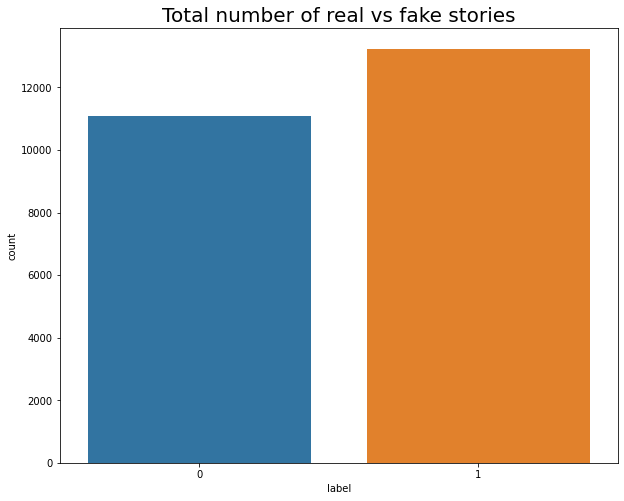

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = df['label'], data = df)
ax.set_title(label = 'Total number of real vs fake stories', fontsize = 20)
plt.show()

# General length of text(s) and title(s)

This is nice to know as each text for the story is plotted out and 

<AxesSubplot:>

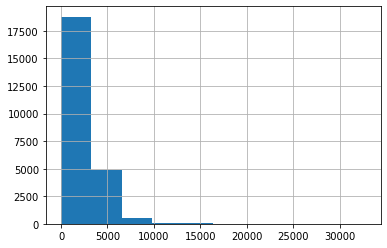

In [9]:
df['text'].str.len().hist()

<AxesSubplot:>

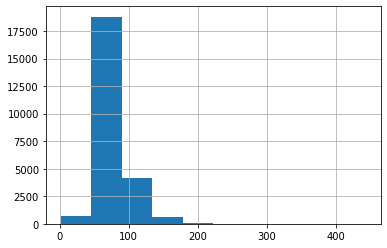

In [10]:
df['title'].str.len().hist()

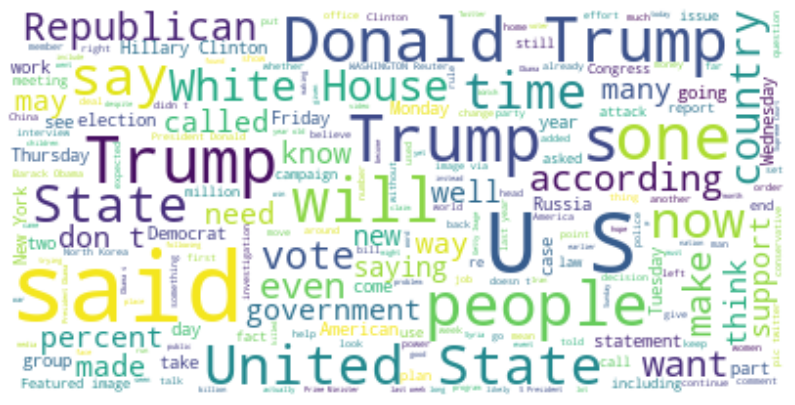

In [35]:
text = " ".join(text for text in df.text)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
# stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:>

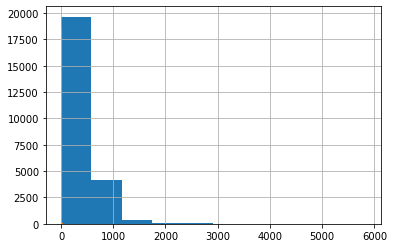

In [ ]:
df.text.str.split().\
    map(lambda x: len(x)).\
    hist()


<AxesSubplot:>

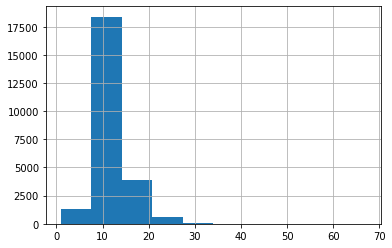

In [12]:
df.title.str.split().\
    map(lambda x: len(x)).\
    hist()

Average title word length

<AxesSubplot:>

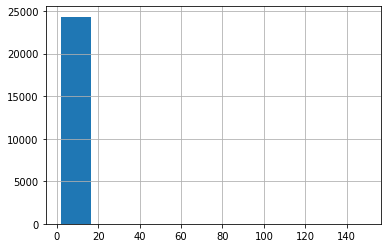

In [27]:
df['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

average word count in text

<AxesSubplot:>

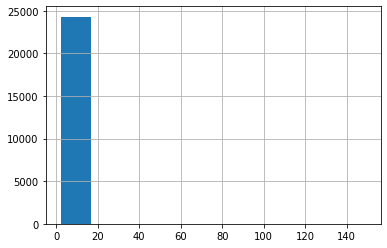

In [34]:
df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [16]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= df['title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#this isn't meaningful yet

from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

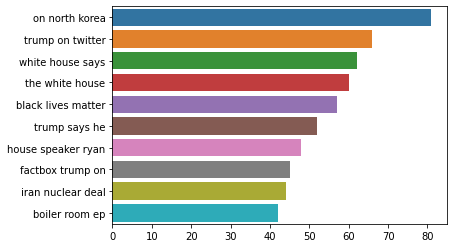

In [30]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_tri_grams=get_top_ngram(df['title'],n=6)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

top_tri_grams=get_top_ngram(df['title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Text Summarization 

switching over to the text summarization, the dataset is an article from NPR about a research group in Australia that is culturing a chip with literal neurons,
which they taught to play pong.

source: https://www.npr.org/sections/health-shots/2022/10/14/1128875298/brain-cells-neurons-learn-video-game-pong

Based on what I've seen, there's two schools of thought for text summarization: extraction based and abstraction based.  
As the name(s) imply, extraction is going for the text which we would want as its seen as "key" in the text or abstraction
which is creating a unique summary based on the given input.  I think the latter sounds more interesting, so the modeling and methods will reflect that.
However, since this webpage doesn't have the text cleanly, I'm going to cheat abit and have the entire document held in a variable "text".  


In [5]:
from transformers import pipeline
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

summarizer = pipeline("summarization")


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 5 files to the new cache system


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
No model was supplied, defaulted to ssh

In [6]:
text = """One month after the United States began what has become a troubled rollout of a national COVID vaccination campaign, the effort is finally gathering real steam.
Close to a million doses -- over 951,000, to be more exact -- made their way into the arms of Americans in the past 24 hours, the U.S. Centers for Disease Control and Prevention reported Wednesday. That's the largest number of shots given in one day since the rollout began and a big jump from the previous day, when just under 340,000 doses were given, CBS News reported.
That number is likely to jump quickly after the federal government on Tuesday gave states the OK to vaccinate anyone over 65 and said it would release all the doses of vaccine it has available for distribution. Meanwhile, a number of states have now opened mass vaccination sites in an effort to get larger numbers of people inoculated, CBS News reported."""


In [7]:
summary_text = summarizer(text, max_length=100, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

 Over 951,000 doses of vaccine were given in the past 24 hours . That's the largest number of shots given in one day since the rollout began . The federal government on Tuesday gave states the OK to vaccinate anyone over 65 .
